# `42-Linear Regression Advertising`

# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Get the Data

In [3]:
ad = pd.read_csv("Advertising.csv")

In [4]:
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
ad.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
ad.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [18]:
ad.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# 3. Explore Data Insights

In [21]:
sns.set_palette("Set1", 8, .75)
sns.set_style("darkgrid")

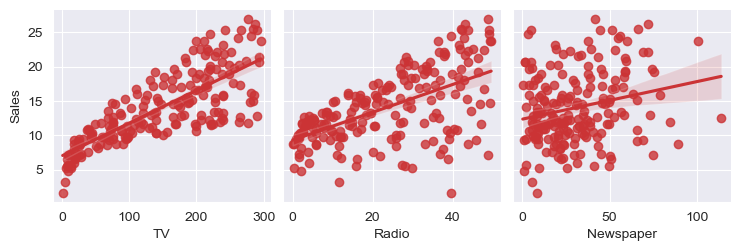

In [23]:
sns.pairplot(ad, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg')
plt.show()

# 4. Training and Testing data

In [26]:
ad.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [28]:
X = ad[['TV', 'Radio', 'Newspaper']]
y = ad['Sales']

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Y Prediction')

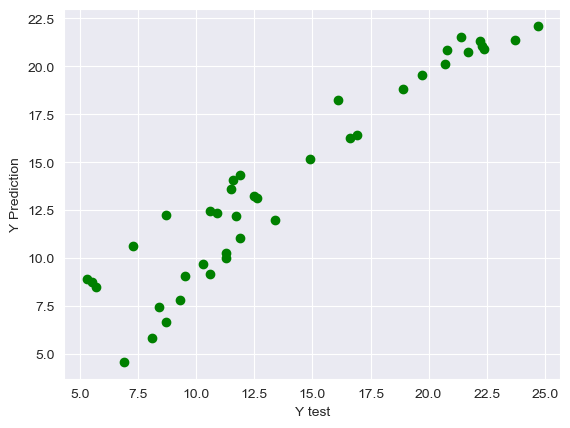

In [41]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Y test')
plt.ylabel('Y Prediction')

# 5. Evaluating Model

In [44]:
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  2.979067338122629
Coefficients:  [0.04472952 0.18919505 0.00276111]


In [46]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1.4607567168117606
MSE:  3.1740973539761046
RMSE:  1.7815996615334502


In [48]:
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

R2 Score:  0.899438024100912


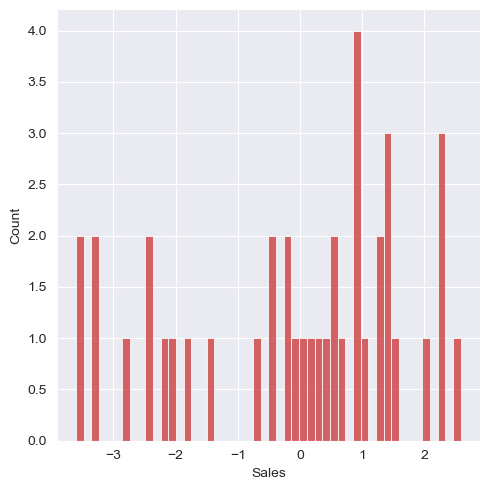

In [57]:
sns.displot(y_test-y_pred, bins=50)

In [50]:
coef_ad = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef_ad

,Coefficient
TV,0.044730
Radio,0.189195
Newspaper,0.002761


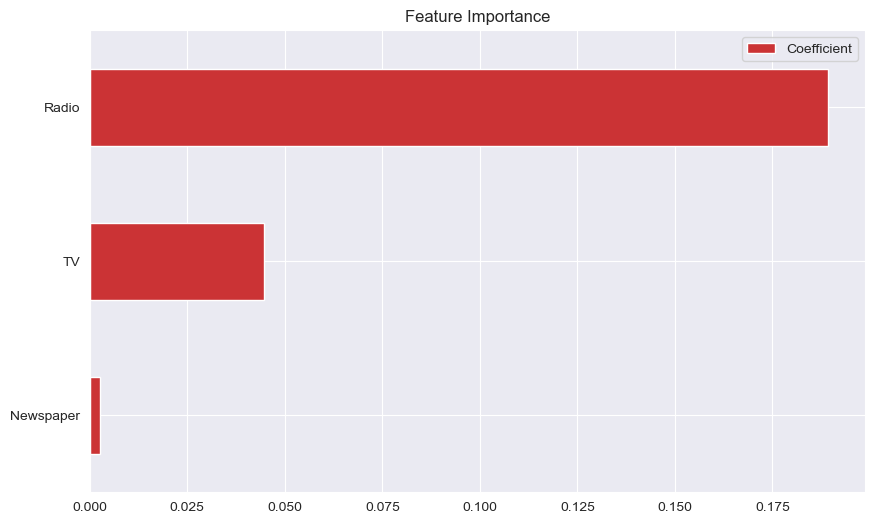

In [52]:
coef_ad.sort_values(by='Coefficient').plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

# 6. Predict new Data

In [55]:
new_data = pd.DataFrame({
    'TV' : [150],
    'Radio': [30],
    'Newspaper': [20]
})

predicted_sales = model.predict(new_data)
print("Predicted Sales: ", predicted_sales[0])

Predicted Sales:  15.419568872288716
